In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

In [2]:
data =  pd.read_csv('co2_mm_gl.csv')

In [3]:
X = data.drop('CO2_conc', axis=1) # Features
y = data['CO2_conc'].to_numpy()
y=y.reshape(len(y),1)

In [4]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [5]:
sc_x = MinMaxScaler()
sc_y=MinMaxScaler()

In [6]:
sc_x = MinMaxScaler()
sc_y=MinMaxScaler()

In [7]:
X_train_sc=sc_x.fit_transform(X_train)
X_test_sc=sc_x.fit_transform(X_test)
y_train_sc=sc_y.fit_transform(y_train)
y_test_sc=sc_y.fit_transform(y_test)
X_val_sc=sc_x.fit_transform(X_val)
y_val_sc=sc_y.fit_transform(y_val)

In [8]:
X_train_sc = X_train_sc.reshape((X_train_sc.shape[0], X_train_sc.shape[1], 1))
X_val_ = X_val_sc.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_sc = X_test_sc.reshape((X_test_sc.shape[0], X_test_sc.shape[1], 1))
y_val = y_val.reshape((y_val.shape[0], y_val.shape[1], 1))

In [9]:
model = Sequential()
model.add(Dense(units=50, activation='relu', input_shape=(2,)))  # 2 input features
model.add(Dropout(0.2))  # Dropout layer with a dropout rate of 0.2
model.add(Dense(units=50, activation='relu'))  # Second hidden layer with 50 neurons
model.add(Dropout(0.2))  # Dropout layer with a dropout rate of 0.2
model.add(Dense(units=1))  

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
history=model.fit(X_train_sc.reshape(-1, X_train_sc.shape[1], 1), y_train_sc, epochs=150, batch_size=16, verbose=2,
         validation_data=(X_val_sc, y_val_sc))

Epoch 1/150
27/27 - 2s - 78ms/step - loss: 0.2124 - val_loss: 0.0243
Epoch 2/150
27/27 - 0s - 4ms/step - loss: 0.0323 - val_loss: 0.0131
Epoch 3/150
27/27 - 0s - 4ms/step - loss: 0.0247 - val_loss: 0.0073
Epoch 4/150
27/27 - 0s - 4ms/step - loss: 0.0193 - val_loss: 0.0048
Epoch 5/150
27/27 - 0s - 5ms/step - loss: 0.0151 - val_loss: 0.0034
Epoch 6/150
27/27 - 0s - 4ms/step - loss: 0.0171 - val_loss: 0.0026
Epoch 7/150
27/27 - 0s - 5ms/step - loss: 0.0138 - val_loss: 0.0024
Epoch 8/150
27/27 - 0s - 4ms/step - loss: 0.0148 - val_loss: 0.0018
Epoch 9/150
27/27 - 0s - 4ms/step - loss: 0.0129 - val_loss: 0.0023
Epoch 10/150
27/27 - 0s - 4ms/step - loss: 0.0105 - val_loss: 0.0025
Epoch 11/150
27/27 - 0s - 4ms/step - loss: 0.0115 - val_loss: 0.0029
Epoch 12/150
27/27 - 0s - 4ms/step - loss: 0.0098 - val_loss: 0.0021
Epoch 13/150
27/27 - 0s - 4ms/step - loss: 0.0091 - val_loss: 0.0019
Epoch 14/150
27/27 - 0s - 4ms/step - loss: 0.0093 - val_loss: 0.0015
Epoch 15/150
27/27 - 0s - 4ms/step - loss:

In [12]:
train_pred=model.predict(X_train_sc)
test_pred=model.predict(X_test_sc)
val_pred=model.predict(X_val)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [13]:
train_mse = mean_squared_error(y_train_sc, train_pred)
test_mse = mean_squared_error(y_test_sc, test_pred)
val_mse=mean_squared_error(y_val_sc,val_pred)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [15]:
train_r_sq = r2_score(y_train_sc, train_pred)
test_r_sq = r2_score(y_test_sc, test_pred)
val_r_sq=r2_score(y_val_sc,val_pred)

In [16]:
print("Training set r_squared:", train_r_sq)
print("Testing set r_squared:", test_r_sq)
print("Validation r_squared:", test_r_sq)

Training set r_squared: 0.9927881968004499
Testing set r_squared: 0.9914882835274721
Validation r_squared: 0.9914882835274721


In [17]:
train_mae = mean_absolute_error(y_train_sc, train_pred)
test_mae = mean_absolute_error(y_test_sc, test_pred)
val_mae=mean_absolute_error(y_val_sc,val_pred)

In [18]:
print("Training set mae:", train_mae)
print("Testing set mae:", test_mae)
print("Validation mae:", test_mae)

Training set mae: 0.018718128337605926
Testing set mae: 0.021963657029880384
Validation mae: 0.021963657029880384


In [15]:
def predict_unknown(features):
    # Ensure features are reshaped appropriately for the model input
    features_2d = np.array(features).reshape(1, -1)
   # features = np.array(features).reshape(1, len(features), 1)
    scaled_features = sc_x.transform(features_2d)
    # Scale the input features
   # scaled_features = sc_x.transform(features)
    sc_features = scaled_features.reshape((scaled_features.shape[0], scaled_features.shape[1], 1))
    # Make predictions
    prediction = model.predict(sc_features)
    prediction=sc_y.inverse_transform(prediction)
    
    # Reverse-transform the prediction to get the final result
    predicted_value = prediction[0][0]
    
    return predicted_value

In [21]:
user_input = []  # User input for features
for feature_name in X.columns:
    feature_value = float(input(f"Enter value for {feature_name}: "))
    user_input.append(feature_value)

Enter value for year:  2050
Enter value for month:  12


In [22]:
predicted_value = predict_unknown(user_input)
print("Predicted value:", predicted_value)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted value: 479.625


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


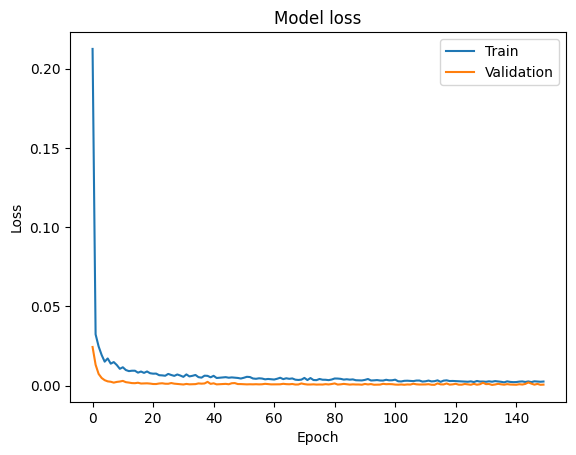

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [20]:
x=X_test['month'].head(10)
y=test_pred[:10]

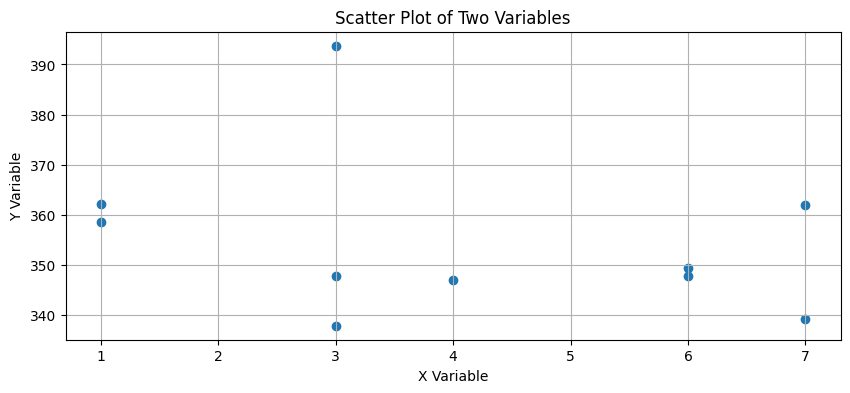

In [25]:
plt.figure(figsize=(10, 4))
plt.scatter(x, y)
plt.xlabel('X Variable')
plt.ylabel('Y Variable')
plt.title('Scatter Plot of Two Variables')
plt.grid(True)  # Optional: add grid
plt.show()

In [23]:
x=X_test['month'].head(10)
y=y_test[:10]

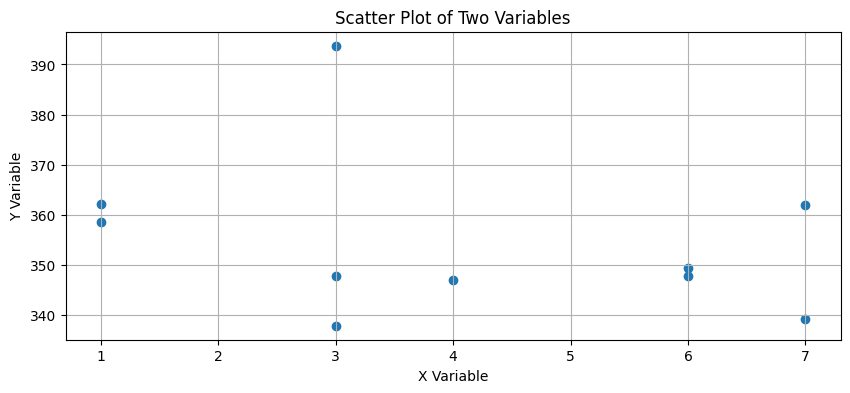

In [24]:
plt.figure(figsize=(10, 4))
plt.scatter(x, y)
plt.xlabel('X Variable')
plt.ylabel('Y Variable')
plt.title('Scatter Plot of Two Variables')
plt.grid(True)  # Optional: add grid
plt.show()